<a href="https://colab.research.google.com/github/Daffodilpearlzz/FMML/blob/main/Module_1_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data and features

In [ ]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=279c120d1e373703e519e297b8d3d4510330ae7a2af5b074819a2dfaca7a2a1d
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


## Part 1

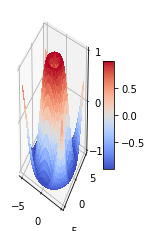

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from mpl_toolkits.mplot3d.axes3d import get_test_data

fig = plt.figure(figsize=plt.figaspect(0.9))
ax = fig.add_subplot(1, 2, 1, projection='3d')
X = np.arange(-5, 5, 0.25) # feature 1
Y = np.arange(-5, 5, 0.25) # feature 2
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R) #output
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0.4, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

## Part 2

In [ ]:
topic1 = 'Giraffe'
topic2 = 'Elephant'
wikipedia.set_lang('en') 
eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content
wikipedia.set_lang('fr')
fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

In [ ]:
eng1

'The giraffe is a tall African hoofed mammal belonging to the genus Giraffa. It is the tallest living terrestrial animal and the largest ruminant on Earth. Traditionally, giraffes were thought to be one species, Giraffa camelopardalis, with nine subspecies. Most recently, researchers proposed dividing giraffes into up to eight extant species due to new research into their mitochondrial and nuclear DNA, as well as morphological measurements. Seven other extinct species of Giraffa are known from the fossil record.\nThe giraffe\'s chief distinguishing characteristics are its extremely long neck and legs, its horn-like ossicones, and its spotted coat patterns. It is classified under the family Giraffidae, along with its closest extant relative, the okapi. Its scattered range extends from Chad in the north to South Africa in the south, and from Niger in the west to Somalia in the east. Giraffes usually inhabit savannahs and woodlands. Their food source is leaves, fruits, and flowers of wood

In [ ]:
eng2

'Elephants are the largest existing land animals. Three living species are currently recognised: the African bush elephant, the African forest elephant, and the Asian elephant. They are an informal grouping within the proboscidean family Elephantidae. Elephantidae is the only surviving family of proboscideans; extinct members include the mastodons. Elephantidae also contains several extinct groups, including the mammoths and straight-tusked elephants. African elephants have larger ears and concave backs, whereas Asian elephants have smaller ears, and convex or level backs. The distinctive features of all elephants include a long proboscis called a trunk, tusks, large ear flaps, massive legs, and tough but sensitive skin. The trunk is used for breathing, bringing food and water to the mouth, and grasping objects. Tusks, which are derived from the incisor teeth, serve both as weapons and as tools for moving objects and digging. The large ear flaps assist in maintaining a constant body te

In [ ]:
fr1

"La Girafe (Giraffa camelopardalis) est une espèce de mammifères ongulés artiodactyles, du groupe des ruminants, vivant dans les savanes africaines et répandue du Tchad jusqu'en Afrique du Sud. Son nom commun vient de l'arabe زرافة, zarāfah, mais l'animal fut anciennement appelé camélopard, du latin camelopardus, contraction de camelus (chameau) en raison du long cou et de pardus (léopard) en raison des taches recouvrant son corps. Après des millions d'années d'évolution, la girafe a acquis une anatomie unique avec un cou particulièrement allongé qui lui permet notamment de brouter haut dans les arbres.\nNeuf populations, se différenciant par leurs robes et formes, ont été décrites par les naturalistes depuis le XIXe siècle parfois comme espèces à part entière, mais généralement considérées comme simples sous-espèces jusqu'au XXIe siècle. Cependant la taxonomie des girafes est actuellement débattue parmi les scientifiques.\nL’espèce est considérée comme vulnérable par l'UICN : il y ava

In [ ]:
fr2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'Éléphant de savane d\'Afrique et l\'Éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« Éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'Éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας signifiant « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

In [ ]:
def cleanup(text):
  text=text.lower()
  text=re.sub('[^a-z]+','',text)
  return text

In [ ]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [ ]:
print(fr2)

leslphantssontdesmammifresproboscidiensdelafamilledeslphantidsilscorrespondentaujourdhuitroisespcesrpartiesendeuxgenresdistinctsllphantdesavanedafriqueetllphantdefortdafriqueautrefoisregroupssouslammeespcedlphantdafriqueappartiennentaugenreloxodontatandisquellphantdasieanciennementappellphantindienappartientaugenreelephasilssediffrencientparcertainescaractristiquesanatomiquesleslphantsdasietantengnralpluspetitsavecdesoreillespluspetitesouencoreunediffrenceduboutdelatrompecesespcessurvivantesfontlocalementlobjetdeprogrammesoudeprojetsderintroductionetdeprotectionlemotfranaislphantvientdumotlatinelephantusquitiresonoriginedugrecsignifiantivoireoulphantllphantapparaitdansdenombreusesculturesilestsymboledesagessedanslacultureasiatiqueconnupoursammoireetsonintelligencequiestcomparecelledesctacsethominidsaristoteavaitditquellphantestlabtequidpassetouteslesautresparlintelligenceetlespritdescriptionllphantdafriquequipeutatteindretonnesestleplusgrosanimalterrestreactuelmaisilestloinderrirelabal

In [ ]:
list(ngrams(eng1,1))
list(ngrams(eng2,8))
list(ngrams(fr2,5))
list(ngrams(fr1,3))

[('l', 'a', 'g'),
 ('a', 'g', 'i'),
 ('g', 'i', 'r'),
 ('i', 'r', 'a'),
 ('r', 'a', 'f'),
 ('a', 'f', 'e'),
 ('f', 'e', 'g'),
 ('e', 'g', 'i'),
 ('g', 'i', 'r'),
 ('i', 'r', 'a'),
 ('r', 'a', 'f'),
 ('a', 'f', 'f'),
 ('f', 'f', 'a'),
 ('f', 'a', 'c'),
 ('a', 'c', 'a'),
 ('c', 'a', 'm'),
 ('a', 'm', 'e'),
 ('m', 'e', 'l'),
 ('e', 'l', 'o'),
 ('l', 'o', 'p'),
 ('o', 'p', 'a'),
 ('p', 'a', 'r'),
 ('a', 'r', 'd'),
 ('r', 'd', 'a'),
 ('d', 'a', 'l'),
 ('a', 'l', 'i'),
 ('l', 'i', 's'),
 ('i', 's', 'e'),
 ('s', 'e', 's'),
 ('e', 's', 't'),
 ('s', 't', 'u'),
 ('t', 'u', 'n'),
 ('u', 'n', 'e'),
 ('n', 'e', 'e'),
 ('e', 'e', 's'),
 ('e', 's', 'p'),
 ('s', 'p', 'c'),
 ('p', 'c', 'e'),
 ('c', 'e', 'd'),
 ('e', 'd', 'e'),
 ('d', 'e', 'm'),
 ('e', 'm', 'a'),
 ('m', 'a', 'm'),
 ('a', 'm', 'm'),
 ('m', 'm', 'i'),
 ('m', 'i', 'f'),
 ('i', 'f', 'r'),
 ('f', 'r', 'e'),
 ('r', 'e', 's'),
 ('e', 's', 'o'),
 ('s', 'o', 'n'),
 ('o', 'n', 'g'),
 ('n', 'g', 'u'),
 ('g', 'u', 'l'),
 ('u', 'l', 's'),
 ('l', 's'

In [ ]:
def t2s(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

def k2s(keys):
  return[t2s(i) for i in keys]

def plothistogram(ngram):
  keys = k2s(ngram.keys())
  values = list(ngram.values())

  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys,values)

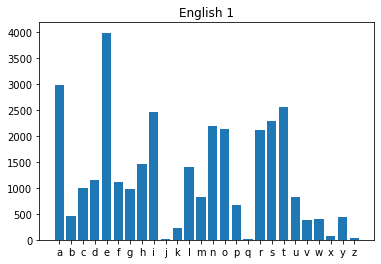

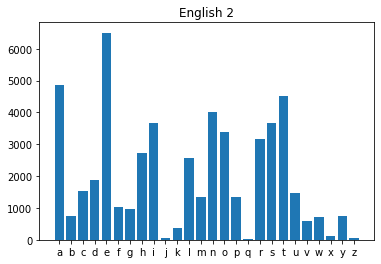

In [ ]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()

unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

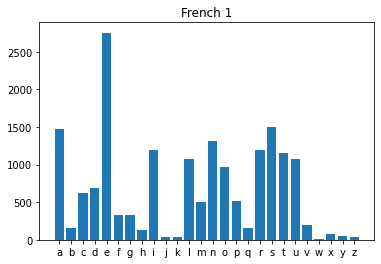

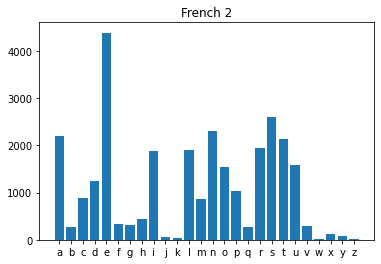

In [ ]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_fr1)
plt.title('French 1')
plt.show()

unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

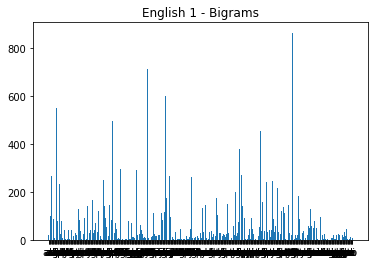

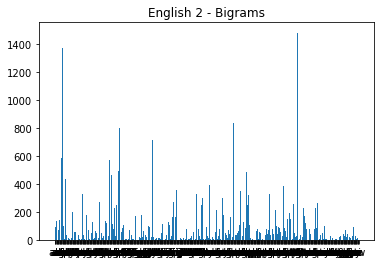

In [ ]:
bigrams_eng1 = Counter(ngrams(eng1,2))
plothistogram(bigrams_eng1)
plt.title('English 1 - Bigrams')
plt.show()

bigrams_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigrams_eng2)
plt.title('English 2 - Bigrams')
plt.show()

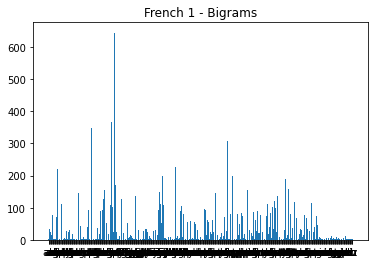

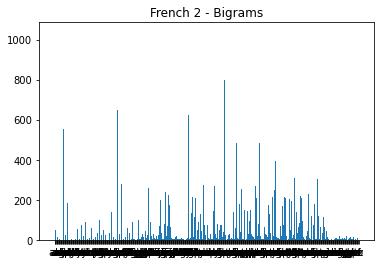

In [ ]:
bigrams_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigrams_fr1)
plt.title('French 1 - Bigrams')
plt.show()

bigrams_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigrams_fr2)
plt.title('French 2 - Bigrams')
plt.show()

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj]=ngram[chr(ord('a')+ii),chr(ord('a')+jj)]
  plt.imshow(freq, cmap = 'jet')
  return freq

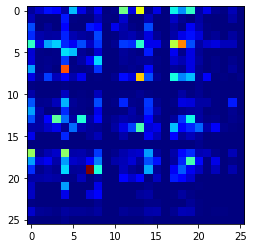

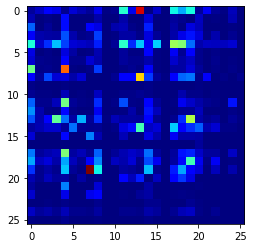

In [ ]:
bieng1 = plotbihistogram(bigrams_eng1)
plt.show()
bieng2 = plotbihistogram(bigrams_eng2)
plt.show()

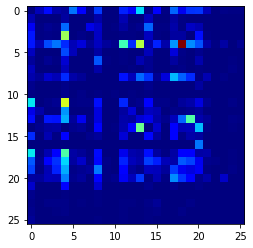

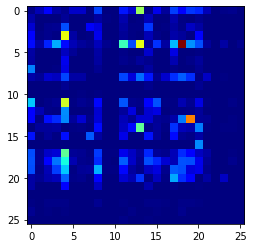

In [ ]:
bifr1 = plotbihistogram(bigrams_fr1)
plt.show()
bifr2 = plotbihistogram(bigrams_fr2)
plt.show()

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [ ]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 863.0
('h', 'e') : 711.0
('e', 's') : 664.0
('i', 'n') : 600.0
('a', 'n') : 549.0
('e', 'r') : 493.0
('r', 'a') : 460.0
('r', 'e') : 453.0
('a', 'l') : 420.0
('n', 'd') : 400.0

English 2:
('t', 'h') : 1479.0
('a', 'n') : 1368.0
('h', 'e') : 1190.0
('i', 'n') : 1014.0
('n', 't') : 833.0
('e', 'r') : 800.0
('e', 's') : 753.0
('r', 'e') : 751.0
('l', 'e') : 723.0
('h', 'a') : 716.0

French 1:
('e', 's') : 645.0
('l', 'e') : 394.0
('e', 'n') : 367.0
('d', 'e') : 349.0
('o', 'n') : 308.0
('n', 't') : 289.0
('r', 'e') : 289.0
('e', 'l') : 277.0
('r', 'a') : 230.0
('l', 'a') : 227.0

French 2:
('e', 's') : 1034.0
('n', 't') : 796.0
('d', 'e') : 657.0
('e', 'n') : 650.0
('l', 'e') : 625.0
('a', 'n') : 555.0
('o', 'n') : 484.0
('r', 'e') : 484.0
('e', 'l') : 439.0
('s', 'e') : 391.0


In [ ]:
topic3 = 'Homo sapiens'
topic4 = 'Cocos nucifera'
wikipedia.set_lang('ml') 
mal1 = wikipedia.page(topic3).content
mal2 = wikipedia.page(topic4).content
wikipedia.set_lang('it')
ita1 = wikipedia.page(topic3).content
ita2 = wikipedia.page(topic4).content

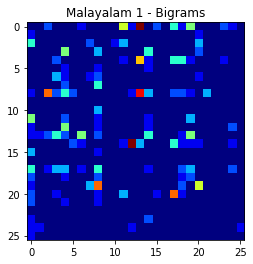

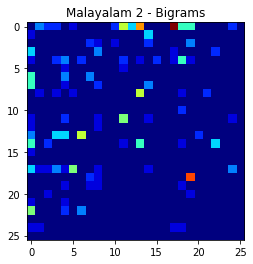

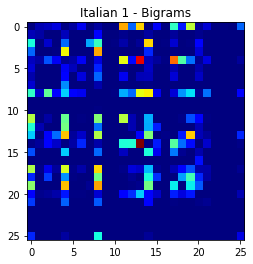

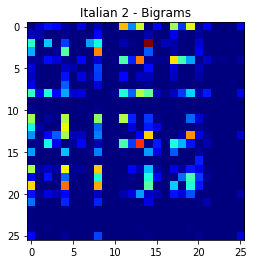

In [ ]:
bigrams_mal1 = Counter(ngrams(mal1,2))
bimal1 = plotbihistogram(bigrams_mal1)
plt.title('Malayalam 1 - Bigrams')
plt.show()

bigrams_mal2 = Counter(ngrams(mal2,2))
bimal2 = plotbihistogram(bigrams_mal2)
plt.title('Malayalam 2 - Bigrams')
plt.show()

bigrams_ita1 = Counter(ngrams(ita1,2))
biita1 = plotbihistogram(bigrams_ita1)
plt.title('Italian 1 - Bigrams')
plt.show()

bigrams_ita2 = Counter(ngrams(ita2,2))
biita2 = plotbihistogram(bigrams_ita2)
plt.title('Italian 2 - Bigrams')
plt.show()

## Features of Images

In [ ]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

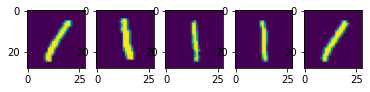

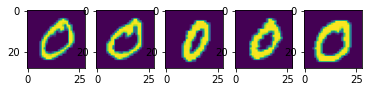

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

In [ ]:
import numpy as np

In [ ]:
sum1 = np.sum(no1>0, (1,2))
sum0 = np.sum(no0>0, (1,2))

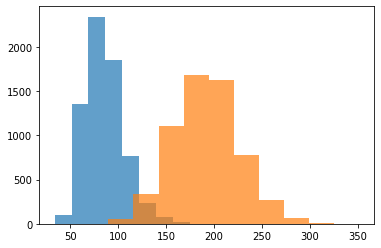

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3)
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4
  hole = hull & ~ (img>0)
  return hole


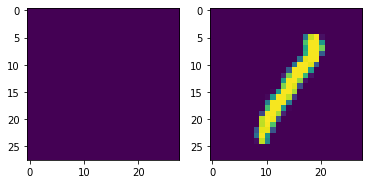

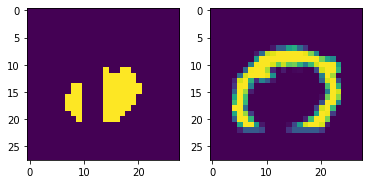

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

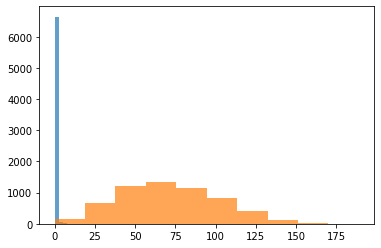

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])
  
plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

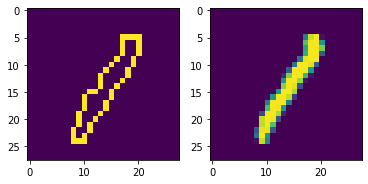

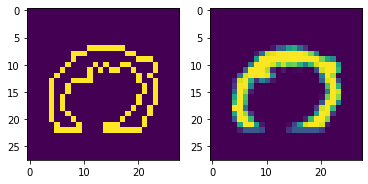

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

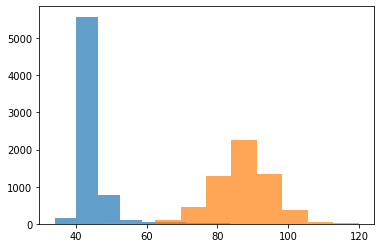

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

#1.What is the best combination of features?
Here, counting the holes and the boundary as well gives a good comparison between the images of 1 and 0
#2. How would you test or visualize four or more features?
By using 3D plots like heatmap, scatterplot etc
#3. Can you come up with your own features?
No. of complete circles of holes, filled pixels or boundary. No. of straight lines within the filled region. Example, in the image 1, there can atleast one straight line formed with the filled pixels but not in the case of 0. There can be atleast one circle, ellipse or a complete curve that can be formed the filled pixels of 0 but not with that of 1
#4. Will these features work for different classes other than 0 and 1?
May be, may be not. for example classification between 1 and 7 might not be easy all the time or that between 0 and 8. some of the features will work for some classes while not with others. the best classifier will work with most of them. here, the number of boundary pixels seems like a good classifier, it may or may not be.
#5. What will happen if we take more that two classes at a time?
Of course classification will be complicated and might lead not more overlapping regions depending upon what is classified. 

##Features from CSV file

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
df = df.rename(columns={''})
df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})

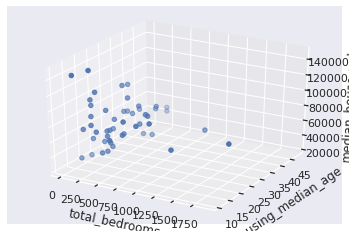

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['total_bedrooms'][:50]
y = df['housing_median_age'][:50]
z = df['median_house_value'][:50]

ax.set_xlabel("total_bedrooms")
ax.set_ylabel("housing_median_age")
ax.set_zlabel("median_house_value")

ax.scatter(x, y, z)

plt.show()

## Task :
Download a CSV file from the internet, upload it to your google drive.#Read the CSV file and plot graphs using different combination of features and write your analysis
Ex : IRIS flower datasaet

In [90]:
csv_file = pd.read_csv('/content/5000 Records.csv')

In [91]:

csv_file.head(10)

,Emp ID,Name Prefix,First Name,Middle Initial,Last Name,Gender,E Mail,Father's Name,Mother's Name,Mother's Maiden Name,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Password
0,526540,Ms.,Angelique,K,Goodwin,F,angelique.goodwin@gmail.com,Rick Goodwin,Dorian Goodwin,Maxey,...,471-57-0359,212-884-7146,Rochester,Monroe,Rochester,NY,14624,Northeast,akgoodwin,z{d>ez%{.@
1,859327,Ms.,Jeni,S,Shaffer,F,jeni.shaffer@gmail.com,Ryan Shaffer,Love Shaffer,Gunderson,...,624-85-4146,205-665-7020,Luverne,Crenshaw,Luverne,AL,36049,South,jsshaffer,7U56!*!O
2,887387,Ms.,Donald,T,Farris,F,donald.farris@bellsouth.net,Mauro Farris,Edyth Farris,Greer,...,097-02-3315,205-959-7879,Hodges,Franklin,Hodges,AL,35571,South,dtfarris,rX.F{j&]&m&&X
3,779497,Hon.,Steven,D,Rendon,M,steven.rendon@gmail.com,Elden Rendon,Angela Rendon,Ortiz,...,134-98-6566,217-858-0054,Savoy,Champaign,Savoy,IL,61874,Midwest,sdrendon,a+2;sx}<G]y
4,896517,Drs.,Jenell,L,Almanza,F,jenell.almanza@yahoo.com,Clifford Almanza,Vergie Almanza,Darby,...,599-92-7345,314-893-2590,Stet,Carroll,Stet,MO,64680,Midwest,jlalmanza,Ou7RX{yT
5,220965,Mrs.,Almeta,Y,Brookins,F,almeta.brookins@gmail.com,Richard Brookins,Angelika Brookins,Pape,...,109-98-3095,229-238-0915,Lyons,Toombs,Lyons,GA,30436,South,aybrookins,HQHKE_+9hv
6,721091,Prof.,Bobbie,E,Branson,M,bobbie.branson@hotmail.com,Joan Branson,Nu Branson,Frazer,...,047-15-8435,216-849-6986,Kalida,Putnam,Kalida,OH,45853,Midwest,bebranson,tA5zrwtY9\!Y
7,633636,Prof.,Bertram,R,Carlisle,M,bertram.carlisle@aol.com,Ivory Carlisle,Bao Carlisle,Cintron,...,257-99-3865,215-614-1953,Hamilton,Jefferson,Hamilton,PA,15744,Northeast,brcarlisle,F4G46Phi$qF
8,823898,Prof.,Carlton,E,Leclair,M,carlton.leclair@cox.net,Elroy Leclair,Georgann Leclair,Merchant,...,044-15-4027,319-943-1308,Panama,Shelby,Panama,IA,51562,Midwest,celeclair,Kce]/Rnti6
9,413865,Mr.,Todd,R,Slater,M,todd.slater@earthlink.net,Donnie Slater,Shay Slater,Conaway,...,553-99-2106,218-671-2547,Young America,Carver,Young America,MN,55558,Midwest,trslater,EZ5}EHI4


In [92]:


csv_file.columns

Index(['Emp ID', 'Name Prefix', 'First Name', 'Middle Initial', 'Last Name',
       'Gender', 'E Mail', 'Father's Name', 'Mother's Name',
       'Mother's Maiden Name', 'Date of Birth', 'Time of Birth', 'Age in Yrs.',
       'Weight in Kgs.', 'Date of Joining', 'Quarter of Joining',
       'Half of Joining', 'Year of Joining', 'Month of Joining',
       'Month Name of Joining', 'Short Month', 'Day of Joining',
       'DOW of Joining', 'Short DOW', 'Age in Company (Years)', 'Salary',
       'Last % Hike', 'SSN', 'Phone No. ', 'Place Name', 'County', 'City',
       'State', 'Zip', 'Region', 'User Name', 'Password'],
      dtype='object')

In [93]:
csv_file.columns[26]

'Last % Hike'

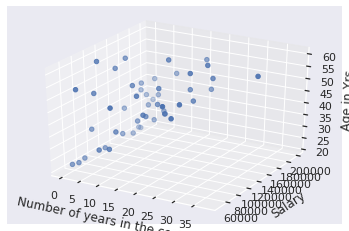

In [94]:
sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = csv_file['Age in Company (Years)'][:50]
y = csv_file['Salary'][:50]
z = csv_file['Age in Yrs.'][:50]

ax.set_xlabel("Number of years in the company")
ax.set_ylabel("Salary")
ax.set_zlabel("Age in Yrs.")

ax.scatter(x, y, z)

plt.show()

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:

from sklearn.datasets import load_iris

In [123]:
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [124]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [125]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


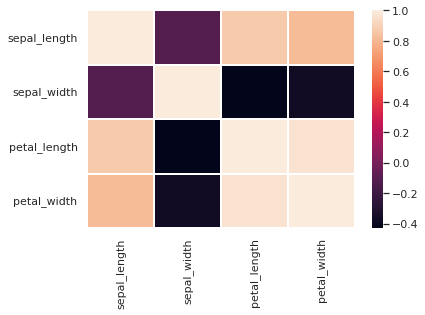

In [126]:
iris = sns.load_dataset("iris")
sns.heatmap(iris.corr(), linecolor = 'white', linewidths = 1)

In [130]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

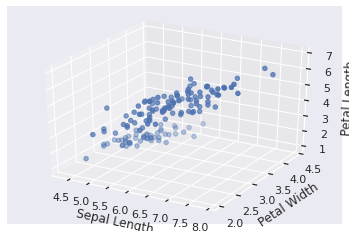

In [134]:
sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = iris['sepal_length']
y = iris['sepal_width']
z = iris['petal_length']

ax.set_xlabel("Sepal Length")
ax.set_ylabel("Petal Width")
ax.set_zlabel("Petal Length")

ax.scatter(x, y, z)

plt.show()

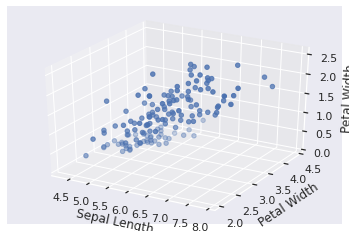

In [135]:
sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = iris['sepal_length']
y = iris['sepal_width']
z = iris['petal_width']

ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Width")

ax.scatter(x, y, z)

plt.show()

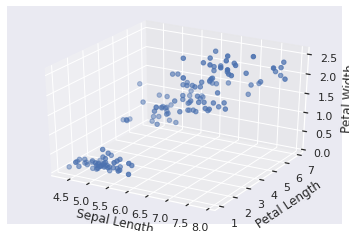

In [136]:
sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = iris['sepal_length']
y = iris['petal_length']
z = iris['petal_width']

ax.set_xlabel("Sepal Length")
ax.set_ylabel("Petal Length")
ax.set_zlabel("Petal Width")

ax.scatter(x, y, z)

plt.show()

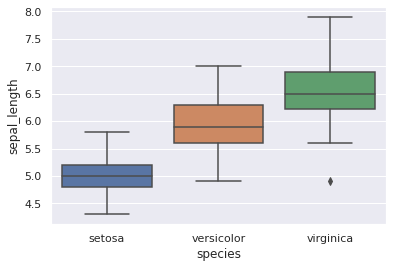

In [140]:
sns.boxplot(y=iris['sepal_length'],x=iris['species'])

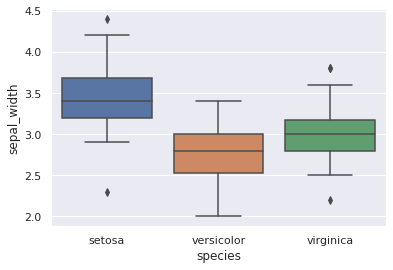

In [141]:
sns.boxplot(y=iris['sepal_width'],x=iris['species'])

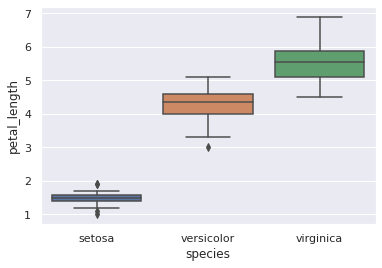

In [142]:
sns.boxplot(y=iris['petal_length'],x=iris['species'])

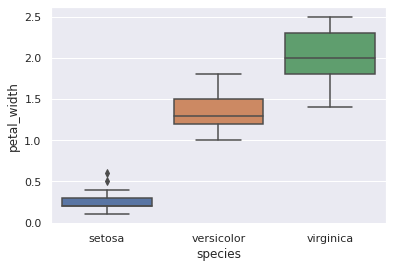

In [145]:
sns.boxplot(y=iris['petal_width'],x=iris['species'])